In [3]:
#import libraries
!pip install kaggle
import kaggle

In [4]:
#download dataset using kaggle API
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0




  0%|          | 0.00/200k [00:00<?, ?B/s]
100%|##########| 200k/200k [00:00<00:00, 346kB/s]
100%|##########| 200k/200k [00:00<00:00, 345kB/s]


In [7]:
#Extract file from zip file
import zipfile

with zipfile.ZipFile('orders.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extract files to the current directory

In [8]:
#read data from file
import pandas as pd
import numpy as np
order_df = pd.read_csv('orders.csv')
order_df.head(20)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [9]:
#check the unique ship mode values
order_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [10]:
#consider null and not availables and unknown in ship mode to null
# Read the CSV file and handle missing values
order_df = pd.read_csv('orders.csv', na_values=['Not Available', 'unknown'])

# Get unique values from the 'Ship Mode' column
unique_ship_modes = order_df['Ship Mode'].unique()

print(unique_ship_modes)

['Second Class' 'Standard Class' nan 'First Class' 'Same Day']


In [14]:
#rename columns names and change it to lowercase
#order_df.columns = order_df.columns.str.lower()
#order_df.columns
#order_df.columns = order_df.columns.str.replace(' ', '_')
order_df.head(5)



,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [15]:
#retrive new columns called discount, sale price and profit
order_df['discount'] = order_df['list_price'] * order_df['discount_percent'] / 100
order_df.head(5)


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0


In [16]:
#calculate sale price
order_df['sale_price'] = order_df['list_price'] - order_df['discount']
order_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0


In [17]:
#calculate profit
order_df['profit'] = order_df['sale_price'] - order_df['cost_price']
order_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [25]:
#convert order date to date
#order_df.dtypes
order_df['order_date']= pd.to_datetime(order_df['order_date'], format="%Y-%m-%d")
order_df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [28]:
#drop cost price, list price and discount percent columns
order_df.drop(columns=['list_price', 'cost_price', 'discount_percent'], inplace=True)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [32]:
# Drop rows with any missing values
#order_df.dropna(inplace=True)
order_df.shape

(9988, 16)

In [38]:
#to extract month from the order date 
order_df['order_month'] = order_df['order_date'].dt.month_name()
order_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,order_month,order_day
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,March,1
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,August,15
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,January,10
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,June,18
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,July,13


In [39]:
#to extract day from the order date 
order_df['order_day'] = order_df['order_date'].dt.day_name()
order_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,order_month,order_day
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,March,Wednesday
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,August,Tuesday
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,January,Tuesday
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,June,Saturday
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,July,Wednesday


In [49]:
#import libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots we will create

In [50]:
#to extract year from the order date 
order_df['order_year'] = order_df['order_date'].dt.year
order_df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,order_month,order_day,order_year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,March,Wednesday,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,August,Tuesday,2023
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,January,Tuesday,2023
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,June,Saturday,2022
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,July,Wednesday,2022


        product_id  sale_price
0  TEC-CO-10004722     59514.0
1  OFF-BI-10003527     26525.3
2  TEC-MA-10002412     21734.4
3  FUR-CH-10002024     21096.2
4  OFF-BI-10001359     19090.2
5  OFF-BI-10000545     18249.0
6  TEC-CO-10001449     18151.2
7  TEC-MA-10001127     17906.4
8  OFF-BI-10004995     17354.8
9  OFF-SU-10000151     16325.8


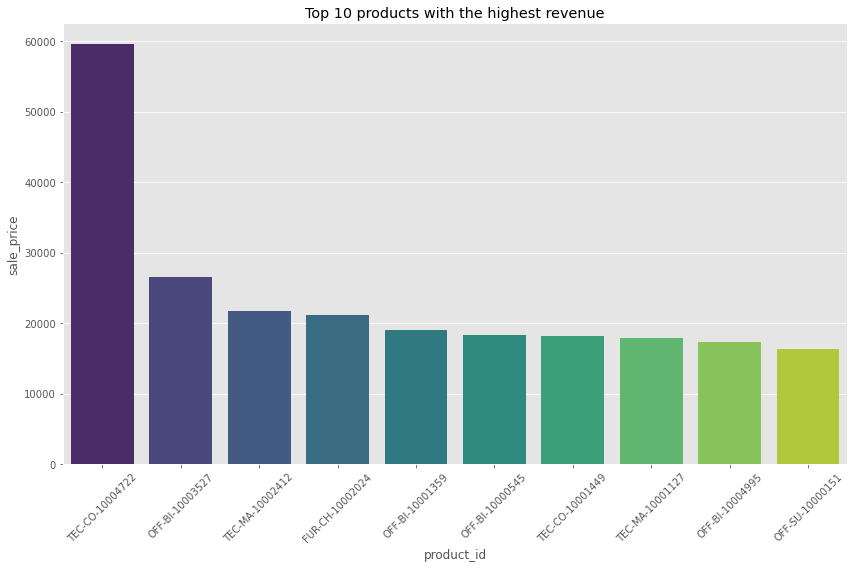

In [55]:
#Top 10 highest revenue generating products
revenue = order_df.groupby('product_id')['sale_price'].sum().sort_values(ascending=False).head(10)
revenue_df = revenue.reset_index()
revenue_df.columns = ['product_id', 'sale_price']

print(revenue_df)

#visual
sns.barplot(x='product_id', y='sale_price', data=revenue_df, palette='viridis')
plt.title("Top 10 products with the highest revenue")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  
plt.show()

In [58]:
#top 5 highest selling product in each region
# Aggregate sales by region and product
region_product_sales = order_df.groupby(['region', 'product_id'])['sale_price'].sum().reset_index()

# Rank products within each region based on sales
region_product_sales['rank'] = region_product_sales.groupby('region')['sale_price'].rank(method='first', ascending=False)

# Filter the top 5 products for each region
top5_products_per_region = region_product_sales[region_product_sales['rank'] <= 5]

# Drop the rank column for final output
top5_products_per_region = top5_products_per_region.drop(columns='rank')

print(top5_products_per_region)

       region       product_id  sale_price
469   Central  OFF-BI-10000545     10132.7
488   Central  OFF-BI-10001120     11056.5
617   Central  OFF-BI-10004995      8416.1
1166  Central  TEC-CO-10004722     16975.0
1168  Central  TEC-MA-10000822     13770.0
1342     East  FUR-BO-10004834     11274.1
1834     East  OFF-BI-10001359      8463.6
2548     East  TEC-CO-10001449      8316.0
2556     East  TEC-CO-10004722     29099.0
2565     East  TEC-MA-10001047     13767.0
3141    South  OFF-BI-10001359      8053.2
3192    South  OFF-BI-10003527      7391.4
3687    South  TEC-MA-10001127     11116.4
3691    South  TEC-MA-10002412     21734.4
3696    South  TEC-MA-10004125      7840.0
3848     West  FUR-CH-10001215      9604.0
4441     West  OFF-BI-10003527      7804.8
4964     West  OFF-SU-10000151     12592.3
5088     West  TEC-AC-10003832      7722.7
5126     West  TEC-CO-10004722     13440.0


In [61]:
#for each category which month had the highest sales
# Aggregate sales by category and month
category_sales = order_df.groupby(['category', 'order_month'])['sale_price'].sum().reset_index()

# Rank months within each category based on sales
category_sales['rank'] = category_sales.groupby('category')['sale_price'].rank(method='first', ascending=False)

# Filter the top month for each category
top_month_per_category = category_sales[category_sales['rank'] == 1]

# Drop the rank column for final output
top_month_per_category = top_month_per_category.drop(columns='rank')

print(top_month_per_category)

           category order_month  sale_price
1         Furniture      August     71649.5
15  Office Supplies    February     77959.5
34       Technology     October    103021.1


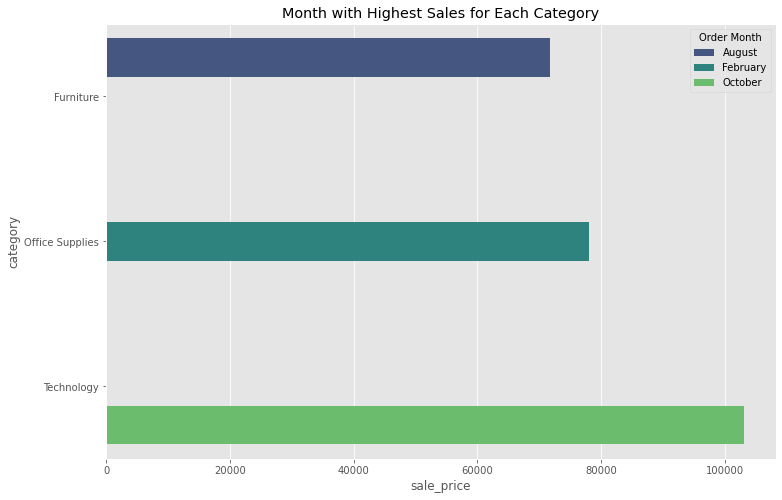

In [64]:
sns.barplot(
    x='sale_price', 
    y='category', 
    hue='order_month', 
    data=top_month_per_category,
    palette='viridis'
)

# Add titles and labels
plt.title('Month with Highest Sales for Each Category')

# Display the legend with title
plt.legend(title='Order Month')

# Show the plot
plt.show()

In [65]:
#find month over month comparison growth comparison for 2022 and 2023
# Aggregate sales by year and month
month_year_growth = order_df.groupby(['order_year', 'order_month'])['sale_price'].sum().reset_index()

# Pivot the table to get sales for each year in separate columns
pivot_df = month_year_growth.pivot(index='order_month', columns='order_year', values='sale_price').reset_index()

# Rename columns for clarity
pivot_df.columns = ['order_month', 'sales_2022', 'sales_2023']

# Calculate month-over-month growth percentage
pivot_df['growth'] = ((pivot_df['sales_2023'] - pivot_df['sales_2022']) / pivot_df['sales_2022']) * 100

print(pivot_df)


   order_month  sales_2022  sales_2023     growth
0        April     95451.6    111568.6  16.884997
1       August    104808.0     87733.6 -16.291123
2     December     95869.9    101673.4   6.053516
3     February     90091.0    128124.2  42.216426
4      January     94712.5     88632.6  -6.419322
5         July     78652.2     90411.8  14.951394
6         June     94170.5     68976.5 -26.753601
7        March     80057.5     80834.0   0.969928
8          May     79448.3     86447.9   8.810258
9     November     84225.3     75366.3 -10.518217
10     October    118912.7    121061.5   1.807040
11   September     79142.2     76658.6  -3.138149


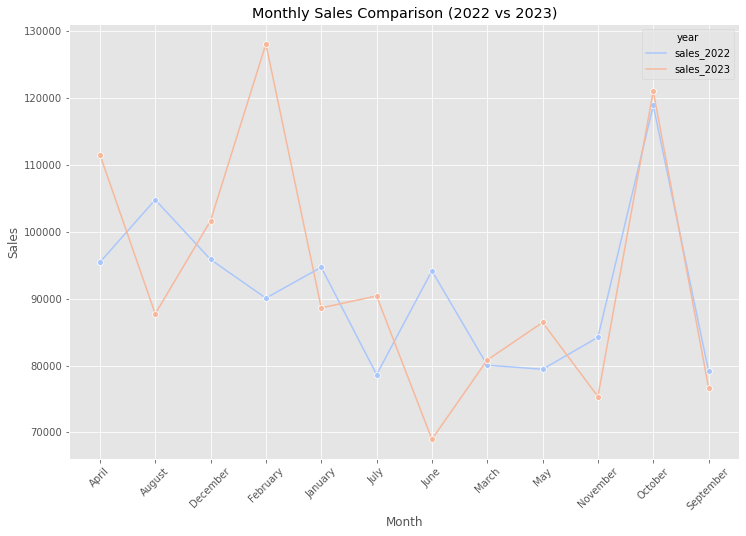

In [67]:
# Create the lineplot
# Melt the DataFrame for easier plotting with seaborn
melted_df = pivot_df.melt(id_vars='order_month', value_vars=['sales_2022', 'sales_2023'], var_name='year', value_name='sales')
sns.lineplot(
    x='order_month', 
    y='sales', 
    hue='year', 
    data=melted_df,
    palette='coolwarm',
    marker='o'
)

# Add titles and labels
plt.title('Monthly Sales Comparison (2022 vs 2023)')
plt.xlabel('Month')
plt.ylabel('Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [68]:
#which sub category had the highest growth by profit in 2023 compare to  2022
# Step 1: Aggregate profit by year and sub-category
subcategory_year_growth = order_df.groupby(['order_year', 'sub_category'])['profit'].sum().reset_index()

# Step 2: Pivot the table to get profit for each year in separate columns
pivot_df = subcategory_year_growth.pivot(index='sub_category', columns='order_year', values='profit').reset_index()

# Rename columns for clarity
pivot_df.columns = ['sub_category', 'profit_2022', 'profit_2023']

# Calculate the growth percentage
pivot_df['growth'] = ((pivot_df['profit_2023'] - pivot_df['profit_2022']) / pivot_df['profit_2022']) * 100

# Step 3: Find the sub-category with the highest growth
highest_growth_subcategory = pivot_df.loc[pivot_df['growth'].idxmax()]

print(highest_growth_subcategory)


sub_category     Machines
profit_2022        7243.2
profit_2023       10878.5
growth          50.189143
Name: 11, dtype: object


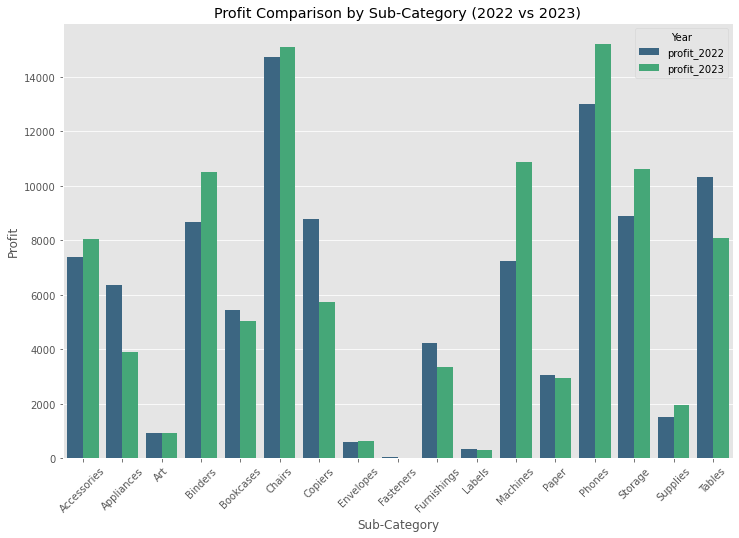

In [70]:
# Melt the DataFrame for easier plotting with seaborn
melted_df = pivot_df.melt(id_vars='sub_category', value_vars=['profit_2022', 'profit_2023'], 
                          var_name='year', value_name='profit')

# Create the barplot
sns.barplot(
    x='sub_category', 
    y='profit', 
    hue='year', 
    data=melted_df,
    palette='viridis'
)
# Add titles and labels
plt.title('Profit Comparison by Sub-Category (2022 vs 2023)')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Year')


# Show the plot
plt.show()
